# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


This notebook focuses on two fundamental applications of Monte Carlo methods. In the first part, numerical integration is performed using Monte Carlo sampling techniques, highlighting the role of statistical estimators and error analysis in improving the accuracy of the results. In the second part, Monte Carlo simulations are applied to discrete and continuous random walks in $3$ dimensions, in order to study diffusion properties and the statistical behavior of stochastic processes. 



This notebook is divided into two main sections:

1. [**Uniform and Importance Sampling**](#uniform-and-importance-sampling)  
   In this section, Monte Carlo methods are applied to evaluate a definite integral. Two different sampling strategies are compared, with particular emphasis on importance sampling as a tool to reduce statistical uncertainties and improve convergence.

2. [**Random Walks**](#random-walks)  
   This section is devoted to the study discrete and continuous random walks in $3$ dimensions. Monte Carlo simulations are used to analyze diffusion properties and to investigate the statistical behavior of stochastic trajectories.


## Uniform and importance sampling

The goal of this section is to compute via Monte Carlo methods the integral:

$$
I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2)\, dx = 1 .
$$  

Monte Carlo integration can be performed using different sampling strategies. The two most common approaches are **uniform sampling** and **importance sampling**.

### Uniform sampling
In uniform sampling, the random points $ x $ are drawn uniformly in the interval $ [a,b] $. The integral  

$$
I = \int_a^b f(x)\, dx
$$  

is estimated as  

$$
I \approx (b-a)\,\frac{1}{N}\sum_{i=1}^N f(x_i),
$$  

with $ x_i $ sampled from the uniform distribution in $ [a,b] $.  

The estimator can be written as  

$$
G_N = \frac{1}{N}\sum_{i=1}^N f(x_i),
$$  

and its expectation value satisfies $ \langle G_N \rangle = I $. The statistical error is a random variable with variance  

$$
\sigma_I^2 = \int_a^b f(x)^2\, dx - I^2 .
$$  

As a consequence, the typical size of the error is  

$$
\epsilon = \frac{\sigma_I}{\sqrt{N}} .
$$  

This scaling, proportional to $ 1/\sqrt{N} $, is a fundamental feature of Monte Carlo integration and does not depend on the dimensionality of the problem.  




When moving from one-dimensional to multidimensional integration, the computational cost of deterministic quadrature methods grows exponentially with the number of dimensions. For instance, in an $n$-dimensional unit hypercube, a quadrature formula based on $m$ points per dimension requires  

$$
N_{\text{points}} = m^n ,
$$  

which becomes unfeasible already for moderate $n$ (the so-called *curse of dimensionality*). The error associated with such quadrature rules is typically bounded by  

$$
\epsilon \;\leq\; c\,h^k ,
$$  

where $h$ is the grid spacing and $k$ depends on the chosen rule. Since $h \sim m^{-1}$, the number of points $N$ grows as $N \sim h^{-n}$, leading to a computational time that scales very unfavorably with $n$.  

In contrast, Monte Carlo integration exhibits a slower convergence rate,  

$$
\epsilon = \frac{\sigma_I}{\sqrt{N}} ,
$$  

but crucially this scaling is **independent of the dimensionality**. Monte Carlo methods become more efficient than deterministic quadrature. We now move from uniform sampling to more advanced strategies such as importance sampling, which improve the variance of the estimator. However, the statistical error still decreases as $1/\sqrt{N}$, independently of the chosen sampling distribution


## Importance sampling
In importance sampling, one rewrites the target integral by introducing an auxiliary probability density $d(x)$ and sampling from it. For an $n$-dimensional integral  

$$
I \;=\; \int_{\Omega} g(x)\,p(x)\,dx ,
$$  

we insert $1 = \int_{\Omega} d(x)\,dx$ with $d(x)\ge 0$ and $\int_{\Omega} d(x)\,dx=1$, obtaining  

$$
I \;=\; \int_{\Omega} \frac{g(x)\,p(x)}{d(x)}\, d(x)\,dx ,
$$  

under the finiteness condition $g(x)p(x)/d(x)<\infty$ except on a set of zero measure. The Monte Carlo estimator reads  

$$
G_N \;=\; \frac{1}{N}\sum_{i=1}^N \frac{g(x_i)\,p(x_i)}{d(x_i)}, \qquad x_i \sim d(x),
$$  

and its variance is  

$$
\mathrm{var}[I]_{d} \;=\; \mathbb{E}_{d}\!\left[\Big(\tfrac{g\,p}{d}\Big)^{2}\right] - I^{2}.
$$  

The optimal choice of $d$ that minimizes the variance under the normalization constraint is obtained by a Lagrange multiplier argument, yielding  

$$
d^{\star}(x) \;\propto\; g(x)\,p(x).
$$  

If $g(x)\ge 0$, then $d^{\star}(x)=\frac{g(x)\,p(x)}{I}$, and the estimator becomes identically $G_N=I$ (zero-variance, formal optimum).


Importance sampling is therefore a powerful variance-reduction device and can regularize singular integrals by matching $d(x)$ to the integrand’s structure. A known limitation appears when the integrand changes sign, which can reintroduce large variances (sign problem).

### Choice of the sampling distribution:

For the evaluation of the integral $I$, let us consider: 

$$
f(x) = \frac{\pi}{2}\cos\!\left(\frac{\pi x}{2}\right), \qquad x \in [0,1],
$$  

with exact integral equal to 1.  

Since $ f(x) $ decreases approximately linearly to zero as $ x \to 1 $, I adopt  

$$
T(x) = 2(1-x), \qquad x \in [0,1],
$$  

which is normalized, positive, and qualitatively similar to $ f(x) $. The corresponding estimator is  

$$
\hat I = \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{T(x_i)}, \qquad x_i \sim T(x).
$$  

This choice reduces the variance by more than an order of magnitude compared to uniform sampling, resulting in much smaller error bars for the same number of samples.


In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import math


In [11]:
def plot_2(file_medie1, file_err1, file_medie2, file_err2, label1="Dataset 1", label2="Dataset 2"):
    # Caricamento dati
    medie1 = np.loadtxt(file_medie1)
    errori1 = np.loadtxt(file_err1)
    medie2 = np.loadtxt(file_medie2)
    errori2 = np.loadtxt(file_err2)

    # Parametri
    M = 100000
    N = 100
    L = M / N
    x = np.arange(N) * L

    # Figura
    plt.figure(figsize=(10,6))
    
    # Primo dataset
    plt.errorbar(x, medie1 - 1, yerr=errori1, ecolor='red', label=label1)
    # Secondo dataset
    plt.errorbar(x, medie2 - 1, yerr=errori2, ecolor='blue', label=label2)

    # Etichette e formattazione
    plt.xlabel('#throws')
    plt.ylabel(r'$ < I > -1 $')
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
    plt.grid(True)
    plt.legend()
    plt.show()


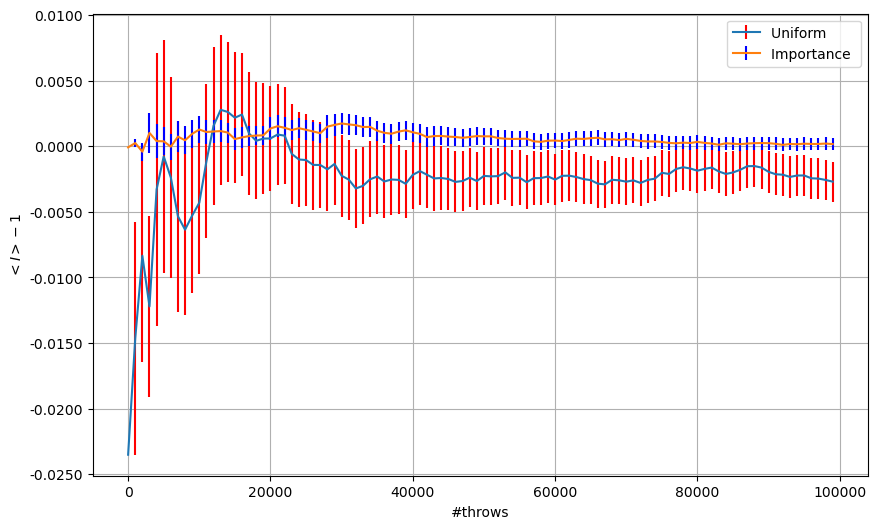

In [12]:
plot_2('main_2_1/output_medie.txt','main_2_1/output_errori.txt' , 'main_2_1/output_medie_sampling.txt', 'main_2_1/output_errori_sampling.txt', label1="Uniform ", label2="Importance ")

**Figure 1.** Comparison between Monte Carlo estimates of the integral using *uniform sampling* (red) and *importance sampling* (blue). The plots show the deviation $\langle I \rangle - 1$ as a function of the number of throws, with statistical uncertainties computed via the data blocking technique.

The figure clearly highlights the improved efficiency of importance sampling: the results converge more rapidly to the exact value, with significantly smaller statistical fluctuations. In contrast, uniform sampling exhibits larger error bars and slower convergence, confirming the effectiveness of choosing a sampling distribution $T(x)=2(1-x)$ tailored to the behavior of the integrand.


## Numerical comparison

In addition to the graphical results, the final numerical estimates confirm the improved efficiency of importance sampling over uniform sampling.  

- **Uniform sampling**:  
  $
  I = 0.99729 \;\; \pm \;\; 0.00152
  $

- **Importance sampling**:  
  $
  I = 1.00016 \;\; \pm \;\; 0.00047
  $

The estimate obtained with importance sampling is closer to the exact value \(I=1\) and exhibits a significantly smaller statistical uncertainty. This provides clear numerical evidence of the variance reduction achieved by using the distribution \(T(x)=2(1-x)\) instead of uniform sampling.


## Random Walks 


### Stochastic processes and Markov processes
- A **stochastic process** is a family of random variables $(X_t)_{t\in I}$ indexed by time $t$:  
  - discrete time: $t \in \mathbb{N}$, sequence $X_1, X_2, \dots$  
  - continuous time: $t \in \mathbb{R}$  
- A stochastic process is fully characterized by its $n$-point joint distributions  
  $$
  p_n(x_1,t_1;\dots;x_n,t_n) = \Pr(X_{t_1}=x_1, \dots, X_{t_n}=x_n).
  $$

- A process is called **Markovian** if it is memoryless: the probability of the future depends only on the present state, not on the entire past.  
  $$
  p(x_n,t_n \mid x_1,t_1;\dots;x_{n-1},t_{n-1}) = p(x_n,t_n \mid x_{n-1},t_{n-1}).
  $$

- As a consequence, a Markov process can be described by:  
  1. the initial distribution $p_1(x_0,t_0)$,  
  2. the one-step transition probability $p_{1|1}(x_{t+\Delta t} \mid x_t)$.  

- All higher-order distributions follow from the Chapman–Kolmogorov relation:  
  $$
  p_{1|1}(x_3,t_3 \mid x_1,t_1) = \int dx_2 \, p_{1|1}(x_3,t_3 \mid x_2,t_2)\, p_{1|1}(x_2,t_2 \mid x_1,t_1).
  $$

### Random Walk as a Markov process
- A **random walk (RW)** is a trajectory built as the sum of successive random steps:  
  $$
  r_N = \sum_{i=1}^N \delta_i,
  $$
  where $\delta_i$ are independent random steps.  

- On a **1D lattice**:  
  - The walker sits at $x = na$ with $n \in \mathbb{Z}$.  
  - At each discrete time $\tau$ it moves with probability $1/2$ to the right ($x \to x+a$) or to the left ($x \to x-a$).  
  - The one-step transition probability is  
    $$
    p_{1|1}(na,(s+1)\tau \mid ma,s\tau) = \tfrac{1}{2}\,\delta_{n,m+1} + \tfrac{1}{2}\,\delta_{n,m-1}.
    $$  

- This depends only on the present position, not on the past history: the random walk is a discrete-time Markov process.

### Evolution equation and continuum limit
- Let $p_1(na,s\tau)$ be the probability of finding the walker at site $x=na$ after $s$ steps.  
- The evolution equation is  
  $$
  p_1(na,(s+1)\tau) = \tfrac{1}{2} \, p_1((n+1)a,s\tau) + \tfrac{1}{2}\, p_1((n-1)a,s\tau).
  $$  

- Subtracting $p_1(na,s\tau)$ from both sides and dividing by $\tau$:  
  $$
  \frac{p_1(na,(s+1)\tau)-p_1(na,s\tau)}{\tau}
  = \frac{a^2}{2\tau} \left[ p_1((n+1)a,s\tau) + p_1((n-1)a,s\tau) - 2p_1(na,s\tau) \right].
  $$

- In the limit $a\to 0, \tau \to 0$ with $D=a^2/(2\tau)$ finite, and identifying $x=na, t=s\tau$, one obtains the **diffusion equation**:  
  $$
  \frac{\partial}{\partial t} p(x,t) = D \frac{\partial^2}{\partial x^2} p(x,t).
  $$

### Solution and properties
- With the initial condition $p(x,0) = \delta(x)$, the solution is a Gaussian:  
  $$
  p(x,t) = \frac{1}{\sqrt{4\pi Dt}} \exp\!\left(-\frac{x^2}{4Dt}\right).
  $$

- The main moments are  
  $$
  \langle x(t)\rangle = 0, \qquad \langle x^2(t)\rangle = 2Dt.
  $$

- In $d$ dimensions, the mean square displacement generalizes to  
  $$
  \langle r^2(t)\rangle = 2dDt.
  $$

### Discrete vs Continuous Random Walk
- **Discrete lattice RW**: each step is of fixed length $a$ along one of the coordinate axes, chosen with equal probability.  
  - Example in 3D: the walker moves by $\pm a$ along $x$, $y$, or $z$ with probability $1/6$ each.  
  - The trajectory is confined to lattice sites.  

- **Continuous isotropic RW**: each step has fixed length $a$, but its **direction** is chosen uniformly at random on the surface of the unit sphere.  
  - The trajectory explores the entire continuous space, not only lattice sites.  
  - This corresponds more closely to physical Brownian motion.  

- Both cases share the same scaling law for the mean square displacement:  
  $$
  \langle r^2(N)\rangle \propto N,
  $$
  and therefore  
  $$
  R(N) \equiv \sqrt{\langle r^2(N)\rangle} \propto \sqrt{N}.
  $$



We simulate 3D random walks of unit step length in two settings:
1. **3D cubic lattice RW**.
2. **Continuos istropic RW**.

For each number of steps $N=1,\dots,N_{\max}$ we estimate
$$
\sqrt{\langle r^2(N)\rangle}
$$
using **data blocking** over $M$ independent walks, and we report error bars obtained by propagating the uncertainty of $\langle r^2\rangle$.  
The theoretical expectation is $\langle r^2(N)\rangle = N a^2$ (with $a=1$), hence $\sqrt{\langle r^2(N)\rangle} \sim \sqrt{N}$.


In [13]:
from scipy.optimize import curve_fit

def plot_RW_results(mean_file_discr, err_file_discr,
                    mean_file_cont,  err_file_cont,
                    label_discr="RW discrete", label_cont="RW continuous"):
    """
    Plot a comparison between the discrete and continuous random walk:
    on the left the discrete case, on the right the continuous one.
    Both are fitted with f(N) = k sqrt(N) and shown with a ±1σ band.
    
    """
    def model(n, k):
        return k * np.sqrt(n)

    def load_and_fit(mean_file, err_file, label, ax):
        mean = np.loadtxt(mean_file)
        err  = np.loadtxt(err_file)
        n_steps = np.arange(1, len(mean)+1)

        # Fit da n=2 in poi (escludo il primo punto con errore nullo)
        fit_slice = slice(1, None)
        popt, pcov = curve_fit(
            model,
            n_steps[fit_slice],
            mean[fit_slice],
            sigma=err[fit_slice],
            absolute_sigma=True
        )
        k, = popt
        k_err = np.sqrt(pcov[0,0])

        # Banda 1σ
        n_fit = np.linspace(1, len(mean), 200)
        y_fit = model(n_fit, k)
        y_err = np.sqrt(n_fit) * k_err

        # Plot
        ax.errorbar(n_steps, mean, yerr=err, fmt='o', ms=1, capsize=2, label=label)
        ax.plot(n_fit, y_fit, '-', color='orange', label=f"fit: k={k:.4f} ± {k_err:.4f}")
        ax.fill_between(n_fit, y_fit-y_err, y_fit+y_err, color='orange', alpha=0.3, label="fit ±1σ")
        ax.set_xlabel("N steps")
        ax.set_ylabel(r"$R = \sqrt{\langle r^2 \rangle}$")
        ax.grid(True, which="both", ls=":")
        ax.legend()

        return k, k_err

    # Figure con due subplot affiancati
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharey=True)

    k_discr, kerr_discr = load_and_fit(mean_file_discr, err_file_discr, label_discr, ax1)
    k_cont,  kerr_cont  = load_and_fit(mean_file_cont,  err_file_cont,  label_cont,  ax2)

    plt.tight_layout()
    plt.show()

    return (k_discr, kerr_discr), (k_cont, kerr_cont)


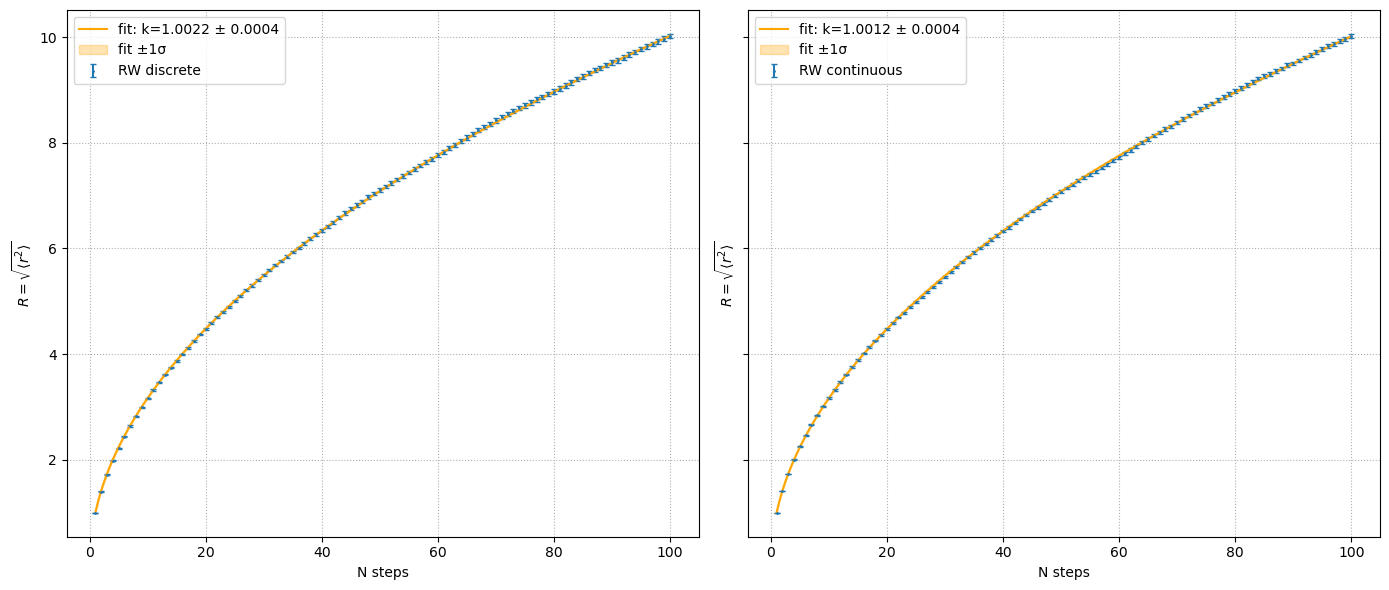

((1.0022416389857822, 0.0004326916243177944),
 (1.0012408420876382, 0.00038190056729619945))

In [14]:
plot_RW_results('main_2_2/mean_discrete.txt', 'main_2_2/err_discrete.txt',
                    'main_2_2/mean_continuos.txt', 'main_2_2/err_continuos.txt' ,
                    label_discr="RW discrete", label_cont="RW continuous")

**Figure 2.** Comparison between the discrete and continuous 3D random walk.  For both cases the mean distance from the origin $R=\sqrt{\langle r^2\rangle}$  is shown as a function of the number of steps $N$. The data are fitted with the law $R = k \sqrt{N}$, where the best–fit parameter $k$ is found to be very close to 1 in both cases. Error bars are included, but they are comparable to the symbol size.The shaded region indicates the $1\sigma$ uncertainty band of the fit.


The figure shows the behavior of the average distance from the origin $R=\sqrt{\langle r^2 \rangle}$ as a function of the number of steps $N$ for both discrete and continuous 3D random walks. In both cases the data are fitted with the functional form $R = k \sqrt{N}$, as expected from diffusion theory.  

The agreement between the simulation points and the fit is excellent: the fitted parameter is $k \approx 1.0$ with very small statistical uncertainty, and the $1\sigma$ confidence band of the fit almost coincides with the data, confirming the correctness of the scaling law.  

From a theoretical point of view, for a 3D random walk with unit step length one expects $\langle r^2(N)\rangle = N$, which leads to $R(N)=\sqrt{N}$ and therefore $k=1$. The simulation results are fully consistent with this prediction, validating both the discrete and continuous implementations of the random walk algorithm.
